In [1]:
%pylab inline
from scipy import ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec

sys.path.append('../../')
from tractionforce.elasticity import *
import gc
from tractionforce.norms import *
from tractionforce.norms import *
from tractionforce.problem import *
from joblib import Parallel, delayed
import multiprocessing
import pickle
import gzip

from PIL import Image


def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
    
def extractn(inlist,n):
    try:
        return inlist[n]
    except:
        return None

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = pickle.load(gzip.open('results/pads_2.gz', 'rb'))


In [3]:
data_error = [extractn(res,2) for res in results][:-1]

reg_error = [extractn(res,3) for res in results][:-1]
lvals = [extractn(res,4) for res in results][:-1]

# kill all nones

data_error = np.array([item for item in data_error if item is not None])
reg_error = np.array([item for item in reg_error if item is not None])
lvals = np.array([item for item in lvals if item is not None])

l_curve_distances = ((reg_error[-1]-reg_error[0])* data_error -  \
            (data_error[-1]-data_error[0])*(reg_error)+data_error[-1]*reg_error[0]-reg_error[-1]*data_error[0])**2
best = np.argsort(l_curve_distances)[-1]

bestresult = results[best]
best_s_vals_x = bestresult[0][0]* 1e4
best_s_vals_y = bestresult[0][1]* 1e4

under_s_vals_x = results[0][0][0]*1e4
under_s_vals_y = results[0][0][1]*1e4

over_s_vals_x = results[-1][0][0]*1e4
over_s_vals_y = results[-1][0][1]*1e4

xlattice = bestresult[0][2]
ylattice = bestresult[0][2]

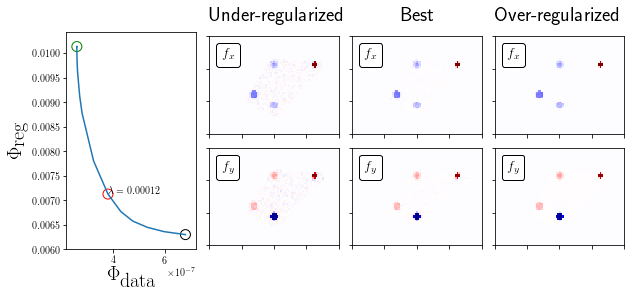

In [7]:
fig = plt.figure(figsize=(10,4))
maxval = 2e-4* 1e4
gs0 = gridspec.GridSpec(1,4, hspace = 0.1,wspace=0.1,width_ratios = [1,1,1,1])
gs_j = []

ax = []
im = []

ax += [plt.Subplot(fig, gs0[0,0])]
fig.add_subplot(ax[-1])
ax[-1].plot( data_error, reg_error)
ax[-1].scatter(data_error[best],reg_error[best],s=100, facecolors='none', edgecolors='r')
ax[-1].scatter(data_error[0],reg_error[0],s=100, facecolors='none', edgecolors='g')
ax[-1].scatter(data_error[-1],reg_error[-1],s=100, facecolors='none', edgecolors='black')
ax[-1].annotate("$\quad\lambda=" + latex_float(lvals[best]) +"$", (data_error[best],reg_error[best]))
ax[-1].set_xlabel(r"$\Phi_{\textrm{data}}$",fontsize=20)
ax[-1].set_ylabel(r"$\Phi_{\textrm{reg}}$",fontsize=20)
#########################################

gs_j += [gridspec.GridSpecFromSubplotSpec(2,1,
                subplot_spec=gs0[1],
                hspace = 0.05,wspace=0.05)]

ax += [plt.Subplot(fig, gs_j[-1][0])]
fig.add_subplot(ax[-1])
im+= [ax[-1].pcolormesh(under_s_vals_x,rasterized=True,
                     cmap='seismic_r',vmax=maxval,vmin=-maxval)]
im[-1].axes.set_aspect('equal')

ax[-1].set_yticklabels([])
ax[-1].set_xticklabels([])


at = AnchoredText("${f}_{x}$",
              prop=dict(size=14), frameon=True,
              loc=2,
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax[-1].add_artist(at)

ax += [plt.Subplot(fig, gs_j[-1][1])]
fig.add_subplot(ax[-1])
im+= [ax[-1].pcolormesh(under_s_vals_y,rasterized=True,
                     cmap='seismic_r',vmax=maxval,vmin=-maxval)]
im[-1].axes.set_aspect('equal')

ax[-1].set_yticklabels([])
ax[-1].set_xticklabels([])

at = AnchoredText("${f}_{y}$",
              prop=dict(size=14), frameon=True,
              loc=2,
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax[-1].add_artist(at)

#########################################

gs_j += [gridspec.GridSpecFromSubplotSpec(2,1,
                subplot_spec=gs0[2],
                hspace = 0.05,wspace=0.05)]

ax += [plt.Subplot(fig, gs_j[-1][0])]
fig.add_subplot(ax[-1])
im+= [ax[-1].pcolormesh(best_s_vals_x,rasterized=True,
                     cmap='seismic_r',vmax=maxval,vmin=-maxval)]
im[-1].axes.set_aspect('equal')

ax[-1].set_yticklabels([])
ax[-1].set_xticklabels([])

at = AnchoredText("${f}_{x}$",
              prop=dict(size=14), frameon=True,
              loc=2,
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax[-1].add_artist(at)

ax += [plt.Subplot(fig, gs_j[-1][1])]
fig.add_subplot(ax[-1])
im+= [ax[-1].pcolormesh(best_s_vals_y,rasterized=True,
                     cmap='seismic_r',vmax=maxval,vmin=-maxval)]
im[-1].axes.set_aspect('equal')

ax[-1].set_yticklabels([])
ax[-1].set_xticklabels([])

at = AnchoredText("${f}_{y}$",
              prop=dict(size=14), frameon=True,
              loc=2,
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax[-1].add_artist(at)

#########################################

gs_j += [gridspec.GridSpecFromSubplotSpec(2,1,
                subplot_spec=gs0[3],
                hspace = 0.05,wspace=0.05)]

ax += [plt.Subplot(fig, gs_j[-1][0])]
fig.add_subplot(ax[-1])
im+= [ax[-1].pcolormesh(over_s_vals_x,rasterized=True,
                     cmap='seismic_r',vmax=maxval,vmin=-maxval)]
im[-1].axes.set_aspect('equal')

ax[-1].set_yticklabels([])
ax[-1].set_xticklabels([])

at = AnchoredText("${f}_{x}$",
              prop=dict(size=14), frameon=True,
              loc=2,
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax[-1].add_artist(at)

ax += [plt.Subplot(fig, gs_j[-1][1])]
fig.add_subplot(ax[-1])
im+= [ax[-1].pcolormesh(over_s_vals_y,rasterized=True,
                     cmap='seismic_r',vmax=maxval,vmin=-maxval)]
im[-1].axes.set_aspect('equal')

ax[-1].set_yticklabels([])
ax[-1].set_xticklabels([])

at = AnchoredText("${f}_{y}$",
              prop=dict(size=14), frameon=True,
              loc=2,
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax[-1].add_artist(at)

ax[1].text(0,70,r"Under-regularized",fontsize=20)
ax[3].text(30,70,r"Best",fontsize=20)
ax[5].text(0,70,r"Over-regularized",fontsize=20)

plt.savefig("../figures/figD1.pdf",bbox_inches='tight', 
               transparent=True)   